In [1]:
import tensorflow as tf 
import os
import numpy as np
import matplotlib.pyplot as plt



  TensorFlow's `tf-nightly` package will soon be updated to TensorFlow 2.0.

  Please upgrade your code to TensorFlow 2.0:
    * https://www.tensorflow.org/beta/guide/migration_guide

  Or install the latest stable TensorFlow 1.X release:
    * `pip install -U "tensorflow==1.*"`

  Otherwise your code may be broken by the change.

  


In [2]:
base_dir = os.path.join(os.path.dirname('D:\Retinaa.zip'), 'Retinaa')

In [3]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='training')

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='validation')

Found 240 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [5]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((64, 224, 224, 3), (64, 2))

In [6]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

{'With': 0, 'Without': 1}


In [7]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)


base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [8]:
base_model.trainable = False

In [9]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(2, activation='softmax')
])

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
conv2d (Conv2D)              (None, 5, 5, 32)          368672    
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 66        
Total params: 2,626,722
Trainable params: 368,738
Non-trainable params: 2,257,984
_________________________________________________________________


In [12]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 4


In [13]:
epochs = 10

history = model.fit_generator(train_generator, 
                    epochs=epochs, 
                    validation_data=val_generator)

Epoch 1/10
4/4 [==============================] - 99s 25s/step - loss: 2.8827 - acc: 0.5958 - val_loss: 0.6696 - val_acc: 0.7500
Epoch 2/10
4/4 [==============================] - 75s 19s/step - loss: 0.5282 - acc: 0.5750 - val_loss: 0.6884 - val_acc: 0.5000
Epoch 3/10
4/4 [==============================] - 77s 19s/step - loss: 0.4365 - acc: 0.5000 - val_loss: 0.6896 - val_acc: 0.7333
Epoch 4/10
4/4 [==============================] - 76s 19s/step - loss: 0.4185 - acc: 0.7958 - val_loss: 0.6891 - val_acc: 0.7500
Epoch 5/10
4/4 [==============================] - 76s 19s/step - loss: 0.3908 - acc: 0.8708 - val_loss: 0.6907 - val_acc: 0.6167
Epoch 6/10
4/4 [==============================] - 77s 19s/step - loss: 0.3845 - acc: 0.8833 - val_loss: 0.6852 - val_acc: 0.7333
Epoch 7/10
4/4 [==============================] - 77s 19s/step - loss: 0.3643 - acc: 0.9167 - val_loss: 0.6838 - val_acc: 0.7333
Epoch 8/10
4/4 [==============================] - 76s 19s/step - loss: 0.3553 - acc: 0.9417 - val

In [14]:
model.save('retina.h5')

In [15]:
import cv2 as cv
import numpy as np
import tensorflow as tf


mymodel= tf.keras.models.load_model('retina.h5')
mymodel.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [16]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
from keras.applications import imagenet_utils, mobilenet





def process_image(img_path):
  img = image.load_img(img_path, target_size=(224, 224))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  pImg = mobilenet.preprocess_input(img_array)
  return pImg


Using TensorFlow backend.


[1]


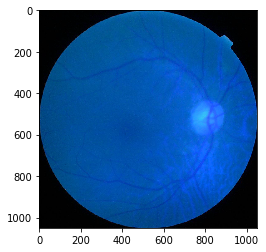

In [18]:
test='wo.png'
img=cv.imread(test)
plt.imshow(img)
img=process_image(test)
pred= mymodel.predict_classes(img) 
print(pred)
